#===============================================================================================================
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
#------- Project: EVALUATION OF SQL INJECTION (SQLi) ATTACK DETECTION STRATEGIES IN WEB ------------------------
#------- APPLICATIONS USING MACHINE LEARNING -------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
#------- By: Santiago Taborda Echeverri ------------------------------------------------------------------------
#-------     santiago.tabordae@udea.edu.co ---------------------------------------------------------------------
#-------     Telecommunications engineering student ------------------------------------------------------------
#-------     Cyber Security Analyst Intern at AizoOn Technology Consulting -------------------------------------
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
#===============================================================================================================

In [1]:
import utils
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import load
import matplotlib.pyplot as plt
from collections import Counter
from statsmodels.stats.weightstats import ztest as ztest

In [2]:
# File paths for input and output CSV files
mithril_total_file_path = 'mithril_total_logs.csv'
mithril_raw_file_path = 'mithril_SQLi_raw.csv'
mithril_extract_file_path = 'mithril_SQLi_Dataset.csv'

# Filter logs and extract relevant data
utils.filter_logs(mithril_total_file_path, mithril_raw_file_path)
utils.extract_data_waf(mithril_raw_file_path, mithril_extract_file_path)

# Convert CSV file to pandas DataFrame
df_waf = pd.read_csv(mithril_extract_file_path)

# Decode 'Query' column using the function decode_data from dataProcessing custum .py
decoded_column = df_waf['Query'].apply(utils.decode_data)
df_waf['decoded_query'] = decoded_column                                # Add decoded query as a new column

# Pre-process the 'Query' column using the function preprocess_input from the utils module custum .py
preprocess_column = df_waf['Query'].apply(utils.preprocess_input)
df_waf['preprocess_column'] = preprocess_column                         # Add the pre-processed data as a new column

column_order = ['Query', 'decoded_query', 'preprocess_column', 'Label'] # Define the desired order of columns
df_waf = df_waf.reindex(columns=column_order)                           # Reorder the DataFrame columns

df_waf

,Query,decoded_query,preprocess_column,Label
0,619389 -- 619387 MAFFEI,619389 -- 619387 MAFFEI,0 - - 0 maffei,1
1,619389 -- 619387 MAFFEI,619389 -- 619387 MAFFEI,0 - - 0 maffei,1
2,619389 -- 619387 consegna,619389 -- 619387 consegna,0 - - 0 consegna,1
3,"619389 -- 619387 MAFFEI ,","619389 -- 619387 MAFFEI ,","0 - - 0 maffei ,",1
4,619389 -- 619387 consegna,619389 -- 619387 consegna,0 - - 0 consegna,1
...,...,...,...,...
18568,"updatexml(0x23,concat(1,md5(999999999)),1),","updatexml(#,concat(1,md5(999999999)),1),","updatexml ( # , concat ( 0 , md 0 ( 0 )...",1
18569,"updatexml(0x23,concat(1,md5(999999999)),1)","updatexml(#,concat(1,md5(999999999)),1)","updatexml ( # , concat ( 0 , md 0 ( 0 )...",1
18570,"updatexml(0,concat(0xa,user()),0)::,","updatexml(0,concat(0xa,user()),0)::,","updatexml ( 0 , concat ( 0 xa , user ( ) ...",1
18571,"updatexml(0,concat(0xa,user()),0)::,","updatexml(0,concat(0xa,user()),0)::,","updatexml ( 0 , concat ( 0 xa , user ( ) ...",1


In [3]:
kaggle_file_path = 'kaggle_SQL_Dataset.csv'             # Define the file path for the dataset

df_kaggle = pd.read_csv(kaggle_file_path)               # Read the dataset into a pandas DataFrame

# Pre-process the 'Query' column using the function preprocess_input from the utils module custum .py
decoded_column = df_kaggle['Query'].apply(utils.decode_data)
df_kaggle['decoded_query'] = decoded_column             # Add the pre-processed data as a new column

# Pre-process the 'Query' column using the function preprocess_input from the utils module custum .py
preprocess_column = df_kaggle['Query'].apply(utils.preprocess_input)
df_kaggle['preprocess_column'] = preprocess_column      # Add the pre-processed data as a new column

column_order = ['Query', 'decoded_query', 'preprocess_column', 'Label']  # Define the desired order of columns
df_kaggle = df_kaggle.reindex(columns=column_order)                      # Reorder the DataFrame columns

df_kaggle

,Query,decoded_query,preprocess_column,Label
0,""" or pg_sleep ( __TIME__ ) --",""" or pg_sleep ( __TIME__ ) --",""" or pg _ sleep ( _ _ time _ _ ) - -",1
1,create user name identified by pass123 tempora...,create user name identified by pass123 tempora...,create user name identified by pass 0 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,AND 1 = utl_inaddr.get_host_address ( ( SELEC...,and 0 = utl _ inaddr . get _ host _ addre...,1
3,select * from users where id = '1' or @ @1 ...,select * from users where id = '1' or @ @1 = ...,select * from users where id = ' 0 ' ...,1
4,"select * from users where id = 1 or 1#"" ( ...","select * from users where id = 1 or 1#"" ( uni...",select * from users where id = 0 or 0 ...,1
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',DELETE FROM door WHERE grow = 'small',delete from door where grow = ' small ',0
30915,DELETE FROM tomorrow,DELETE FROM tomorrow,delete from tomorrow,0
30916,SELECT wide ( s ) FROM west,SELECT wide ( s ) FROM west,select wide ( s ) from west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),SELECT * FROM ( SELECT slide FROM breath ),select * from ( select slide from breath ),0


In [4]:
df_analysis_waf = pd.DataFrame(columns=['words', 'word_freq', 'unique_words_count', 'Label'])
df_analysis_waf['words'] = df_waf['preprocess_column'].apply(utils.process_input_analysis)
df_analysis_waf['unique_words_count'] = df_analysis_waf['words'].apply(lambda row: len(set(row)))
df_analysis_waf['word_freq'] = df_analysis_waf['words'].apply(Counter)
df_analysis_waf['Label'] = df_waf['Label']

df_analysis_kaggle = pd.DataFrame(columns=['words', 'word_freq', 'unique_words_count', 'Label'])
df_analysis_kaggle['words'] = df_kaggle['preprocess_column'].apply(utils.process_input_analysis)
df_analysis_kaggle['unique_words_count'] = df_analysis_kaggle['words'].apply(lambda row: len(set(row)))
df_analysis_kaggle['word_freq'] = df_analysis_kaggle['words'].apply(Counter)
df_analysis_kaggle['Label'] = df_kaggle['Label']

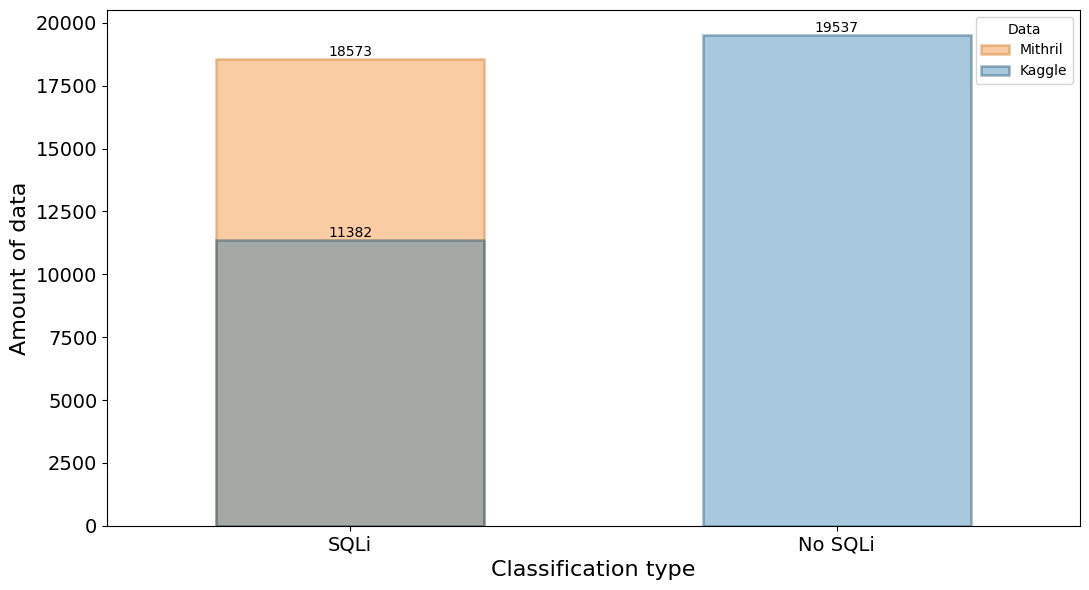

In [5]:
plt.figure(figsize=(11, 6))

label_mapping = {
    1: 'SQLi',
    0: 'No SQLi'
}

df_analysis_waf['Label_graph'] = df_analysis_waf['Label'].map(label_mapping)
df_analysis_kaggle['Label_graph'] = df_analysis_kaggle['Label'].map(label_mapping)

# Plotting the first count plot for WAF data
ax = sns.countplot(x=df_analysis_waf['Label_graph'], label='Mithril', alpha=0.4, color='#ff7f0e', saturation=0.9, edgecolor='#cc6a0a', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[0])

# Plotting the second count plot for Kaggle data, overlaying on the same axes
ax = sns.countplot(x=df_analysis_kaggle['Label_graph'], label='Kaggle', alpha=0.4, color='#1f77b4', saturation=0.9, edgecolor='#0a456d', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[1])

plt.xlabel("Classification type", fontsize=16)
plt.ylabel("Amount of data", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title="Data", loc='upper right')
plt.tight_layout()

plt.savefig("./images/data_base_distribution_en.pdf", format="pdf", dpi=75, bbox_inches="tight")

plt.show()

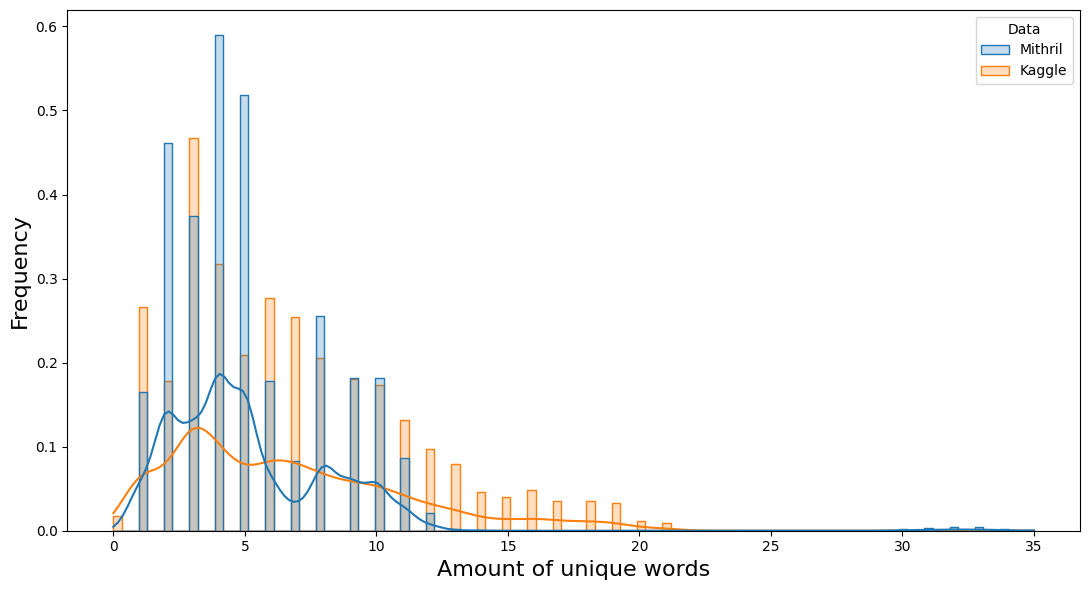

In [6]:
df_kaggle_attack = df_analysis_kaggle[df_analysis_kaggle['Label'] == 1].copy()
df_kaggle_attack = df_kaggle_attack.reset_index()
df_kaggle_attack['Data'] = 'Kaggle'

df_waf_attack = df_analysis_waf.copy()
df_waf_attack['Data'] = 'Mithril'

df_analysis_attack = pd.concat([df_waf_attack, df_kaggle_attack], ignore_index=True)

plt.figure(figsize=(11, 6))

sns.histplot(df_analysis_attack, x="unique_words_count", hue="Data", element="step", stat="density", common_norm=False,kde=True)

plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Amount of unique words', fontsize=16)
plt.tight_layout()

plt.savefig("./images/distribution_unique_words_en.pdf", format="pdf", dpi=75, bbox_inches="tight")

plt.show()

In [7]:
z_score, p_value = ztest(df_analysis_kaggle['unique_words_count'] , df_analysis_waf['unique_words_count']) 

print('Z-score:', z_score,'\nP-value:', p_value)

Z-score: 14.47155884348141 
P-value: 1.832710135153467e-47


In [9]:
df_result = pd.concat([df_kaggle, df_waf], ignore_index=True)

columns_to_keep = ["preprocess_column", "Label"]
df_result = df_result[columns_to_keep]

df_result['duplicates'] = np.where(df_result['preprocess_column'].duplicated(keep=False), 1, 0)
df_noDuplicates = df_result.copy()
df_noDuplicates = df_noDuplicates.drop_duplicates(subset=['preprocess_column'], keep='first')
df_noDuplicates = df_noDuplicates.reset_index(drop=True)


print('Top 10 common duplicate texts are:')
df_result[df_result.duplicates == 1].pivot_table(index='preprocess_column', values='Label', aggfunc='count').sort_values(by='Label', ascending=False).head(10)

Top 10 common duplicate texts are:


,Label
preprocess_column,
0,972
"0 union all select 0 , ( @ @ version ) - -",771
user @ email,770
0 . 0 e + 0,646
' ) or ` 0 ` = ` 0 ` ; - - -,576
"0 ' union select 0 , 0 , 0 , concat ( < / a > ) , 0 , 0 , 0 , md 0 ( 0 ) , 0 from qs _ admin ,",478
"updatexml ( 0 , concat ( 0 xa , user ( ) ) , 0 ) : :",476
' ) union select * from ( select null ) as a 0 join ( select 0 ) as u join ( select user ( ) ) as b 0 join ( select user ( ) ) as b 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 join ( select null ) as a 0 where ( ' % ' = ',476
"updatexml ( # , concat ( 0 , md 0 ( 0 ) ) , 0 )",472


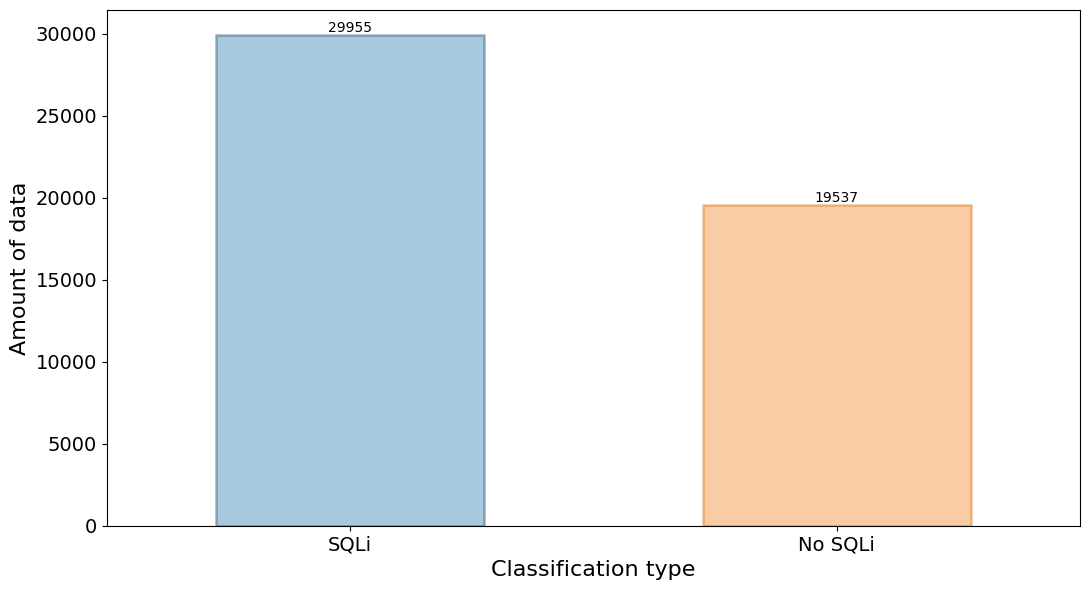

In [10]:
df_result['Label_graph'] = df_result['Label'].map(label_mapping)

plt.figure(figsize=(11, 6))


ax = sns.countplot(x=df_result[df_result['Label_graph'] == 'SQLi']['Label_graph'], alpha=0.4, color='#1f77b4', saturation=0.9, edgecolor='#0a456d', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[0])

ax = sns.countplot(x=df_result[df_result['Label_graph'] == 'No SQLi']['Label_graph'], alpha=0.4, color='#ff7f0e', saturation=0.9, edgecolor='#cc6a0a', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[1])


plt.xlabel("Classification type", fontsize=16)
plt.ylabel("Amount of data", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("./images/data_base_distribution_duplicates_en.pdf", format="pdf", dpi=75, bbox_inches="tight")

plt.show()

In [11]:
vectorizer_duplicates_noBalanced = load('./noBalanced_models/vectorizer_duplicates.joblib')

df_result_vectorized = utils.NLP_load_transform(df_result["preprocess_column"], df_result["Label"], vectorizer_duplicates_noBalanced)

X = df_result_vectorized.drop(columns=['Label'])
y = df_result_vectorized['Label']

X_balanced, y_balanced = utils.balancing_data(X, y, 'RandomOverSampler')

df_duplicates_balanced = pd.concat([X_balanced, y_balanced], axis=1)

df_duplicates_balanced = df_duplicates_balanced.rename(columns={df_duplicates_balanced.columns[-1]: 'Label'})

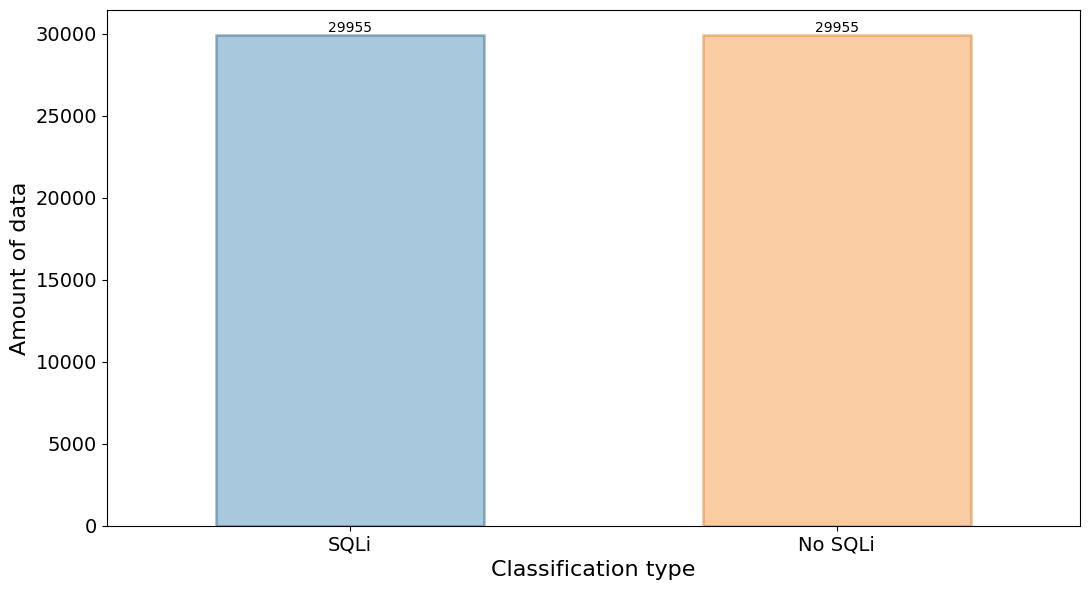

In [12]:
df_duplicates_balanced['Label_graph'] = df_duplicates_balanced['Label'].map(label_mapping)

plt.figure(figsize=(11, 6))


ax = sns.countplot(x=df_duplicates_balanced[df_duplicates_balanced['Label_graph'] == 'SQLi']['Label_graph'], alpha=0.4, color='#1f77b4', saturation=0.9, edgecolor='#0a456d', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[0])

ax = sns.countplot(x=df_duplicates_balanced[df_duplicates_balanced['Label_graph'] == 'No SQLi']['Label_graph'], alpha=0.4, color='#ff7f0e', saturation=0.9, edgecolor='#cc6a0a', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[1])


plt.xlabel("Classification type", fontsize=16)
plt.ylabel("Amount of data", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("./images/data_base_distribution_duplicates_balanced_en.pdf", format="pdf", dpi=75, bbox_inches="tight")

plt.show()

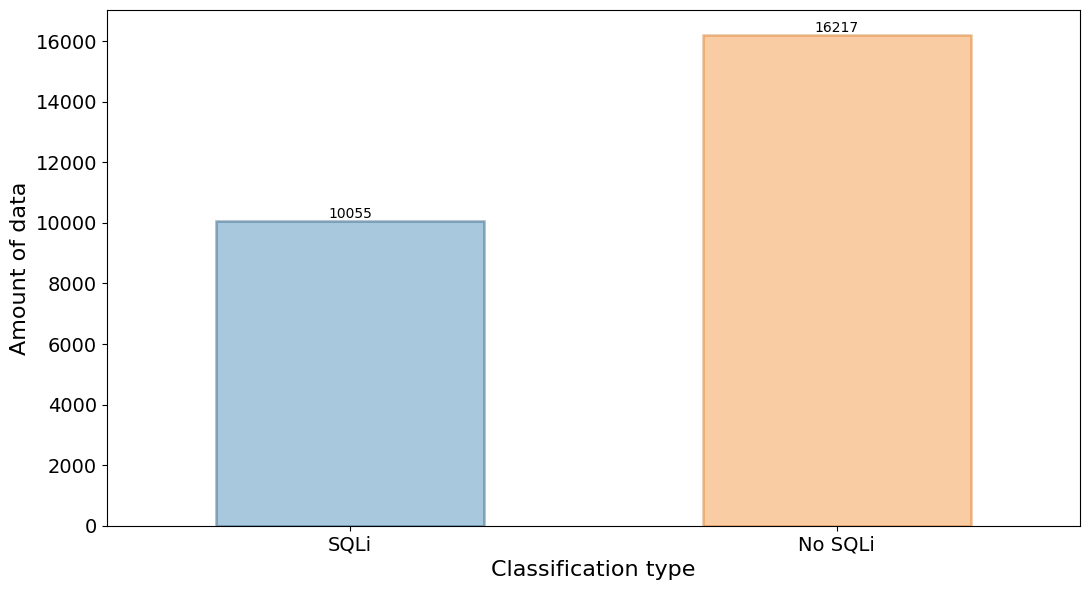

In [13]:
df_noDuplicates['Label_graph'] = df_noDuplicates['Label'].map(label_mapping)

plt.figure(figsize=(11, 6))

ax = sns.countplot(x=df_noDuplicates[df_noDuplicates['Label_graph'] == 'SQLi']['Label_graph'], alpha=0.4, color='#1f77b4', saturation=0.9, edgecolor='#0a456d', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[0])

ax = sns.countplot(x=df_noDuplicates[df_noDuplicates['Label_graph'] == 'No SQLi']['Label_graph'], alpha=0.4, color='#ff7f0e', saturation=0.9, edgecolor='#cc6a0a', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[1])

plt.xlabel("Classification type", fontsize=16)
plt.ylabel("Amount of data", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("./images/data_base_distribution_noDuplicates_en.pdf", format="pdf", dpi=75, bbox_inches="tight")

plt.show()

In [14]:
vectorizer_noDuplicates_noBalanced = load('./noBalanced_models/vectorizer_noDuplicates.joblib')

df_noDuplicates_vectorized = utils.NLP_load_transform(df_noDuplicates["preprocess_column"], df_noDuplicates["Label"], vectorizer_noDuplicates_noBalanced)

X2 = df_noDuplicates_vectorized.drop(columns=['Label'])
y2 = df_noDuplicates_vectorized['Label']

X2_balanced, y2_balanced = utils.balancing_data(X2, y2, 'RandomUnderSampler')

df_noDuplicates_balanced = pd.concat([X2_balanced, y2_balanced], axis=1)

df_noDuplicates_balanced = df_noDuplicates_balanced.rename(columns={df_noDuplicates_balanced.columns[-1]: 'Label'})

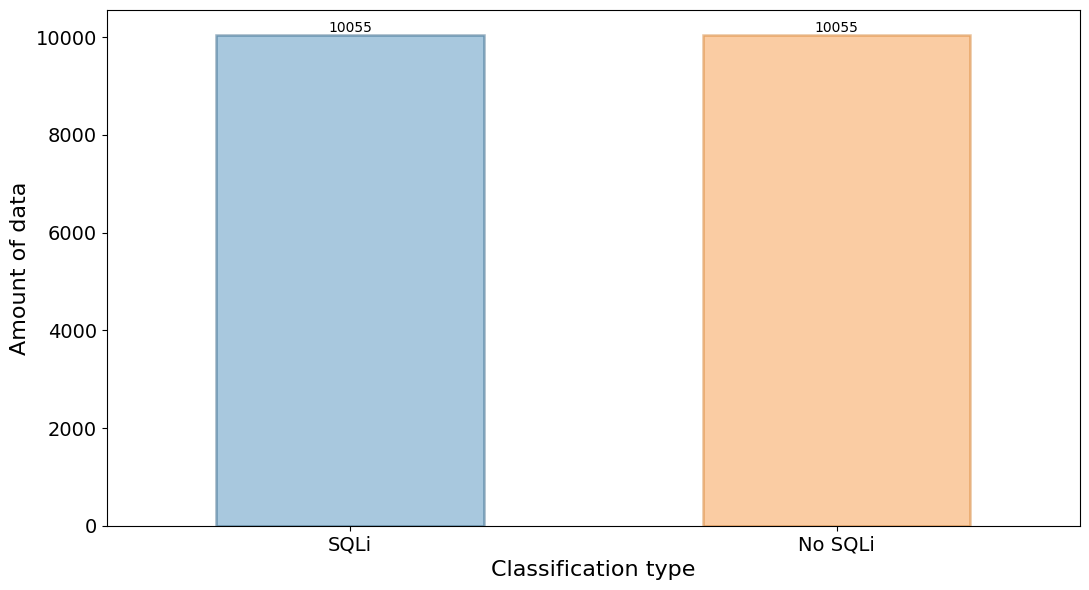

In [15]:
df_noDuplicates_balanced['Label_graph'] = df_noDuplicates_balanced['Label'].map(label_mapping)

plt.figure(figsize=(11, 6))


ax = sns.countplot(x=df_noDuplicates_balanced[df_noDuplicates_balanced['Label_graph'] == 'SQLi']['Label_graph'], alpha=0.4, color='#1f77b4', saturation=0.9, edgecolor='#0a456d', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[0])

ax = sns.countplot(x=df_noDuplicates_balanced[df_noDuplicates_balanced['Label_graph'] == 'No SQLi']['Label_graph'], alpha=0.4, color='#ff7f0e', saturation=0.9, edgecolor='#cc6a0a', linewidth=1.8, width=0.55)
ax.bar_label(ax.containers[1])


plt.xlabel("Classification type", fontsize=16)
plt.ylabel("Amount of data", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("./images/data_base_distribution_noDuplicates_balanced_en.pdf", format="pdf", dpi=75, bbox_inches="tight")

plt.show()